In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=083b633c248158602076499e3d8d7201


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | the valley
Processing Record 4 of Set 1 | kiama
Processing Record 5 of Set 1 | asau
Processing Record 6 of Set 1 | jalu
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | lianran
Processing Record 14 of Set 1 | elko
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | jiaozuo
Processing Record 20 of Set 1 | sao geraldo do araguaia
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | ribeira gra

Processing Record 35 of Set 4 | najran
Processing Record 36 of Set 4 | kamaishi
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | morant bay
Processing Record 39 of Set 4 | isangel
Processing Record 40 of Set 4 | zhigansk
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | silver city
Processing Record 43 of Set 4 | jacksonville
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | meoqui
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | beloha
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | broken hill
Processing Record 3 of Set 5 | houma
Processing Record 4 of Set 5 | molchanovo
Processing Record 5 of Set 5 | waddan
Processing Record 6 of Set 5 | talcahuano
Processing Record 7 of Set 5 | pekan
Processing Record 8 of Set 5 | ma

Processing Record 26 of Set 8 | rungata
City not found. Skipping...
Processing Record 27 of Set 8 | slave lake
Processing Record 28 of Set 8 | russell
Processing Record 29 of Set 8 | abha
Processing Record 30 of Set 8 | kamenka
Processing Record 31 of Set 8 | baruun-urt
Processing Record 32 of Set 8 | sept-iles
Processing Record 33 of Set 8 | boizenburg
Processing Record 34 of Set 8 | tabuk
Processing Record 35 of Set 8 | norwich
Processing Record 36 of Set 8 | vallenar
Processing Record 37 of Set 8 | omsukchan
Processing Record 38 of Set 8 | chadiza
Processing Record 39 of Set 8 | aksarka
Processing Record 40 of Set 8 | buchanan
Processing Record 41 of Set 8 | prainha
Processing Record 42 of Set 8 | santa rosalia
Processing Record 43 of Set 8 | artyk
City not found. Skipping...
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | atambua
Processing Record 46 of Set 8 | christiana
Processing Record 47 of Set 8 | lunglei
Processing Record 48 of Set 8 | pr

Processing Record 16 of Set 12 | los llanos de aridane
Processing Record 17 of Set 12 | otkaznoye
Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | simoes
Processing Record 20 of Set 12 | mrirt
City not found. Skipping...
Processing Record 21 of Set 12 | waipawa
Processing Record 22 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 23 of Set 12 | montepuez
Processing Record 24 of Set 12 | caravelas
Processing Record 25 of Set 12 | camabatela
Processing Record 26 of Set 12 | cedar city
Processing Record 27 of Set 12 | kyzyl-suu
Processing Record 28 of Set 12 | jiwani
Processing Record 29 of Set 12 | keuruu
Processing Record 30 of Set 12 | port lavaca
Processing Record 31 of Set 12 | praya
Processing Record 32 of Set 12 | cockburn town
Processing Record 33 of Set 12 | partur
Processing Record 34 of Set 12 | pangnirtung
Processing Record 35 of Set 12 | banepa
Processing Record 36 of Set 12 | ankara
Processing Record 37 o

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.26,80,20,5.75,AR,2022-04-07 11:46:46
1,Busselton,-33.6500,115.3333,65.82,70,52,3.02,AU,2022-04-07 11:48:05
2,The Valley,18.2170,-63.0578,78.10,88,20,10.36,AI,2022-04-07 11:48:05
3,Kiama,-34.6833,150.8667,69.01,78,100,3.00,AU,2022-04-07 11:48:05
4,Asau,46.4333,26.4000,62.96,42,99,12.26,RO,2022-04-07 11:48:06
5,Jalu,29.0331,21.5482,101.70,8,0,24.81,LY,2022-04-07 11:48:06
6,New Norfolk,-42.7826,147.0587,57.70,68,5,1.05,AU,2022-04-07 11:48:07
7,Qaanaaq,77.4840,-69.3632,-4.77,76,85,7.09,GL,2022-04-07 11:48:07
8,Puerto Ayora,-0.7393,-90.3518,77.20,88,51,7.43,EC,2022-04-07 11:48:07
9,Albany,42.6001,-73.9662,45.39,87,100,7.00,US,2022-04-07 11:45:08


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-07 11:46:46,-54.8000,-68.3000,35.26,80,20,5.75
1,Busselton,AU,2022-04-07 11:48:05,-33.6500,115.3333,65.82,70,52,3.02
2,The Valley,AI,2022-04-07 11:48:05,18.2170,-63.0578,78.10,88,20,10.36
3,Kiama,AU,2022-04-07 11:48:05,-34.6833,150.8667,69.01,78,100,3.00
4,Asau,RO,2022-04-07 11:48:06,46.4333,26.4000,62.96,42,99,12.26
...,...,...,...,...,...,...,...,...,...
549,Haines Junction,CA,2022-04-07 12:02:22,60.7522,-137.5108,17.42,97,100,2.17
550,Andradas,BR,2022-04-07 12:02:22,-22.0681,-46.5692,72.16,85,38,2.91
551,Datong,CN,2022-04-07 12:03:23,40.0936,113.2914,62.35,19,1,7.11
552,Shaunavon,CA,2022-04-07 12:03:23,49.6501,-108.4181,26.89,87,3,6.46


In [12]:
city_data_df.count()

City          554
Country       554
Date          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
dtype: int64

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

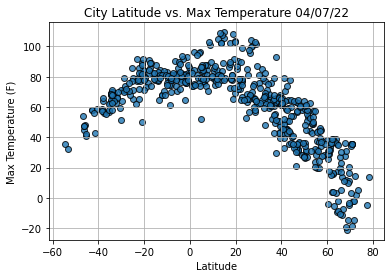

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

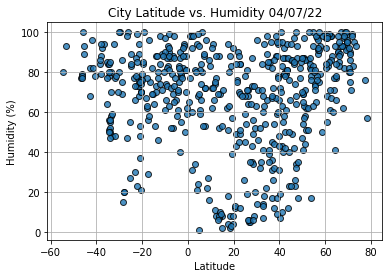

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

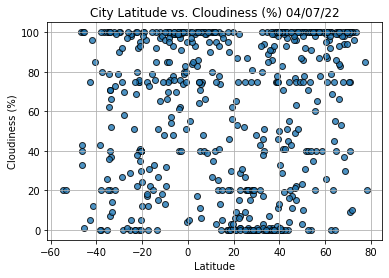

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

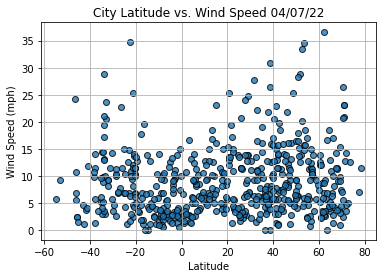

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                         Elko
Country                        US
Date          2022-04-07 11:48:09
Lat                       41.0002
Lng                     -115.5012
Max Temp                    32.65
Humidity                       43
Cloudiness                      0
Wind Speed                    3.0
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

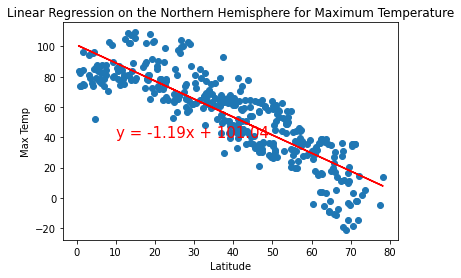

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

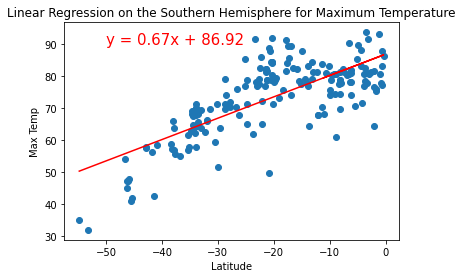

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

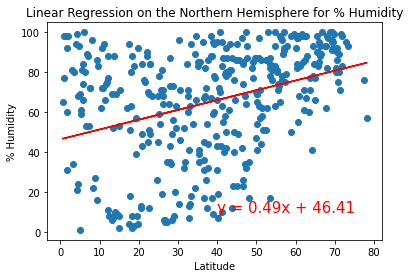

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

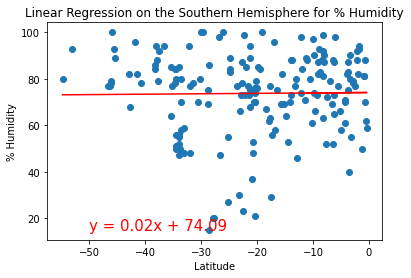

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

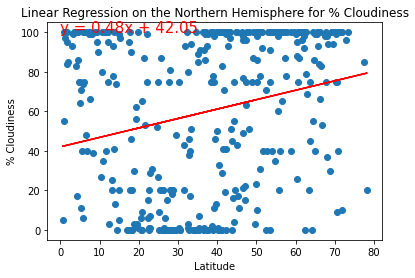

In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,100))

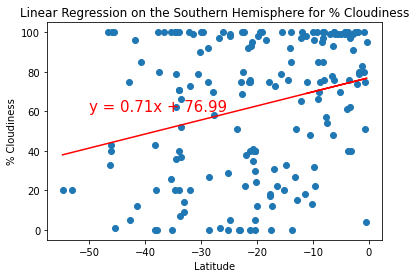

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

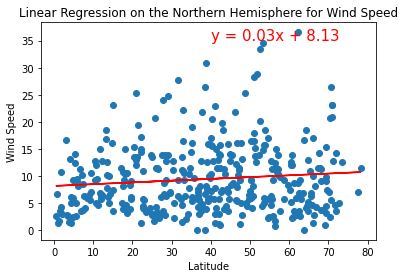

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(40,35))